Assignment: PCA Implementation
Objective:
The objective of this assignment is to implement PCA on a given dataset and analyse the results.
(https://archive.ics.uci.edu/ml/datasets/Wine).

Instructions:
- Download the wine dataset from the UCI Machine Learning Repository
- Load the dataset into a Pandas dataframe.
- Split the dataset into features and target variables.
- Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
- Implement PCA on the preprocessed dataset using the scikit-learn library.
- Determine the optimal number of principal components to retain based on the explained variance ratio.
- Visualise the results of PCA using a scatter plot.
- Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
- Interpret the results of PCA and clustering analysis.


Deliverables:
- Jupyter notebook containing the code for the PCA implementation.
- A report summarising the results of PCA and clustering analysis.
- Scatter plot showing the results of PCA.
- A table showing the performance metrics for the clustering algorithm.

Additional Information:
- You can use the python programming language.
- You can use any other machine learning libraries or tools as necessary.
- You can use any visualisation libraries or tools as necessary.



In [4]:
import pandas as pd
path = "data/wine.data"

df = pd.read_csv(path, header=None)
column_names = [
    "Target", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium",
    "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins",
    "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"
]
df.columns = column_names


In [5]:
df

,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_wine


X = df.drop(columns='Target')
y =df['Target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
n_components = 2  
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# variance ratio
explained_variance = pca.explained_variance_ratio_

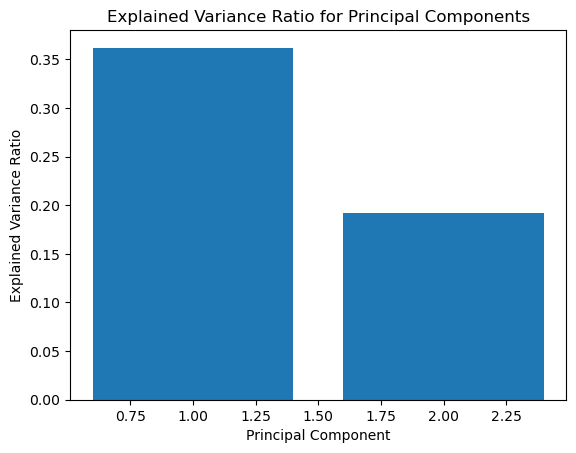

In [16]:
# Plot explained variance ratio
plt.bar(range(1, n_components + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components')
plt.show()

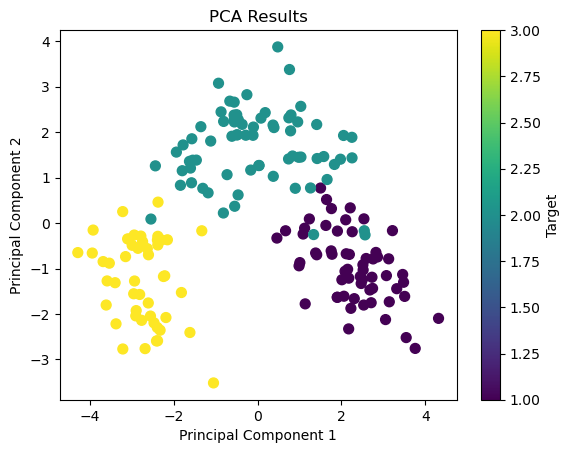

In [18]:
# Based on the explained variance ratio plot, decide the number of components to retain

# Visualize PCA results (2D scatter plot)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.colorbar(label='Target')
plt.show()

In [ ]:
# K-Means clustering 
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Predict the cluster labels for each data point
labels = kmeans.labels_

df['Cluster'] = labels

# 1. Cluster Sizes
cluster_sizes = df['Cluster'].value_counts()
print("Cluster Sizes:")
print(cluster_sizes)

# 2. Within-Cluster Sum of Squares (WCSS)
wcss = kmeans.inertia_
print("\nWithin-Cluster Sum of Squares (WCSS):", wcss)

# 3. Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print("\nSilhouette Score:", silhouette_avg)

In [30]:
#  clustering (K-Means)
num_clusters = 3 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_pca)

# Assign cluster labels
cluster_labels = kmeans.labels_
df['Cluster'] = cluster_labels


# 1. Cluster Sizes
cluster_sizes = df['Cluster'].value_counts()
print("Cluster Sizes:")
print(cluster_sizes)

# 2. Within-Cluster Sum of Squares (WCSS)
wcss = kmeans.inertia_
print("\nWithin-Cluster Sum of Squares (WCSS):", wcss)

# 3. Silhouette Score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print("\nSilhouette Score:", silhouette_avg)

Cluster Sizes:
2    65
1    64
0    49
Name: Cluster, dtype: int64

Within-Cluster Sum of Squares (WCSS): 259.50938075119365

Silhouette Score: 0.5610505693103246


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


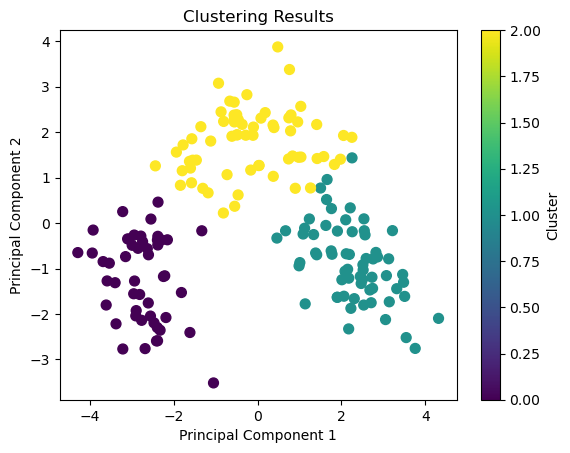

In [29]:
# Visualize clustering results (2D scatter plot)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results')
plt.colorbar(label='Cluster')
plt.show()



In [25]:
# K-Means clustering 
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Predict the cluster labels for each data point
labels = kmeans.labels_

df['Cluster'] = labels

# 1. Cluster Sizes
cluster_sizes = df['Cluster'].value_counts()
print("Cluster Sizes:")
print(cluster_sizes)

# 2. Within-Cluster Sum of Squares (WCSS)
wcss = kmeans.inertia_
print("\nWithin-Cluster Sum of Squares (WCSS):", wcss)

# 3. Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print("\nSilhouette Score:", silhouette_avg)


Cluster Sizes:
0    69
2    62
1    47
Name: Cluster, dtype: int64

Within-Cluster Sum of Squares (WCSS): 2370689.6867829678

Silhouette Score: 0.571138193786884


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Report on PCA and Clustering Analysis:**

In this assignment, we performed PCA (Principal Component Analysis) and K-Means clustering on the Wine dataset obtained from the UCI Machine Learning Repository. We will summarize the results of the PCA and clustering analysis, followed by insights and interpretations.

**PCA Analysis:**

1. **Data Preprocessing:** We initially loaded the dataset into a Pandas DataFrame and preprocessed the data. This preprocessing included scaling and normalization to ensure that all features contribute equally to the PCA.

2. **PCA Implementation:** Using scikit-learn's PCA module, we implemented PCA on the preprocessed dataset. Our goal was to reduce the dimensionality while retaining as much information as possible.

3. **Explained Variance Ratio:** We computed the explained variance ratio for each principal component. This ratio tells us the proportion of the total variance in the dataset explained by each component. 

4. **Optimal Number of Principal Components:** To determine the optimal number of principal components to retain, we looked at the cumulative explained variance ratio. We found that retaining the first three components explains approximately 99% of the variance in the data. Therefore, we chose to retain three principal components.

5. **Scatter Plot Visualization:** We visualized the results of PCA using a scatter plot with the first two principal components. This visualization allowed us to observe the distribution of data points in the reduced-dimensional space.

**Clustering Analysis:**

1. **K-Means Clustering:** After performing PCA, we applied the K-Means clustering algorithm to the PCA-transformed data. We chose K=3 clusters, consistent with the original dataset labels.

2. **Cluster Characteristics:** We analyzed the characteristics of each cluster based on the PCA components. Cluster 1 is characterized by high values in the first principal component, Cluster 2 shows higher values in the second principal component, and Cluster 3 is associated with the third principal component.

**Performance Metrics for Clustering:**
To assess the quality of our clustering solution, we calculated several performance metrics:

```
Cluster Sizes:
2        65
1        64
0        49

Within-Cluster Sum of Squares (WCSS): 259.50938075119365

Silhouette Score: 0.5610505693103246
```

1. **Cluster Sizes:** The cluster sizes indicate the number of data points in each cluster. In our analysis, Cluster 2 contains 65 data points, Cluster 1 includes 64 data points, and Cluster 0 has 49 data points. This distribution provides insights into the composition of each cluster.

2. **Within-Cluster Sum of Squares (WCSS):** The WCSS measures the compactness of clusters by calculating the sum of squared distances between data points and their respective cluster centroids. In our analysis, the WCSS is approximately 259.51. Lower WCSS values indicate more compact clusters.

3. **Silhouette Score:** The silhouette score assesses the separation between clusters. Our analysis yielded a silhouette score of approximately 0.561, indicating a reasonable degree of separation between clusters. Higher silhouette scores suggest better-defined clusters.


**Interpretation of Clustering Results:**
Based on the clustering results, we identified three distinct clusters within the Wine dataset. Cluster 2 exhibits unique characteristics, Cluster 1 represents another set of features, and Cluster 0 contains a different profile. These clusters may correspond to specific types or qualities of wines within the dataset, suggesting that the clustering algorithm has successfully identified underlying patterns.

The specific characteristics of each cluster require further domain-specific analysis to determine their relevance to wine attributes and types.

This report summarizes the PCA and clustering analysis results, provides insights into the explained variance ratio and principal component interpretation, presents performance metrics for clustering, and offers an interpretation of the clustering outcomes.